###**Classifying Alcoholic and Control group from the data**

Here, we have 10 alcoholic and 10 control group subjects. Each subject was exposed to different stimulus situation. In the data preparation, we created a dataset with proper formatting.

Now, we use this data to predict alcoholic and control group subject using basic shallow neural network and creating 2 dimension data from all channels and then using convolutional neural network. Details of each neural network will be describe later as required.

Importing intial libraries...

In [1]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [2]:
# Path to main directory in linked shared drive. Change it according to requirement.
main_dir = 'drive/My Drive/Data/EEG_project/'

In [3]:
# Make list of all csv files to use it later to combine.
fname = []
for file_name in glob.glob(main_dir+'csv/*.csv'):
    fname.append(file_name)

In [86]:
# Create a combined dataframe using all csv files.
df_new = pd.DataFrame()
for i in range(len(fname)):
    path = fname[i]
    df1 = pd.read_csv(path, delimiter = '\t')
    df_new = df_new.append(df1)
    #print(i)

In [6]:
# Print the dataframe to visualize data int abluar format.
df_new

,trial_num,chan_name,epoch,voltage,subject_id,stimulus,alcoholic
0,25,FP1,0,-77.291,co2a0000371,S2 match,True
1,25,FP1,1,22.319,co2a0000371,S2 match,True
2,25,FP1,2,63.822,co2a0000371,S2 match,True
3,25,FP1,3,-9.420,co2a0000371,S2 match,True
4,25,FP1,4,-99.264,co2a0000371,S2 match,True
...,...,...,...,...,...,...,...
16379,19,Y,251,-13.438,co2a0000371,S2 nomatch,True
16380,19,Y,252,-11.973,co2a0000371,S2 nomatch,True
16381,19,Y,253,-11.973,co2a0000371,S2 nomatch,True
16382,19,Y,254,-13.438,co2a0000371,S2 nomatch,True


In [7]:
# Create list od all subject ids, channel names, and epochs
sid = df_new['subject_id'].unique()
chan = df_new['chan_name'].unique()
epoch = df_new['epoch'].unique()

**1. Shallow Neural Network:**

In this simple neural network, we will create single layer neural network.
The process to this model is as follows:



*   Prepare data as per our requirements.

  *   The dataframe should only has channels data as columns, epochs as rows and the last column as target variables. In our case, target variable will be Boolean. Alcoholic - True or False

*   Divide data into 80-20 part for training and testing respectively.

*   Create single layer sequential model using Keras libraries
*   Train and Test the model





In [8]:
# Create Empty dataframe for our shallow neural network model.
df_data = pd.DataFrame(columns=chan)
df_data['FP1'] = [None]*int(len(df_new)/len(chan))
df_data['class'] = [None]*int(len(df_new)/len(chan))

In [9]:
#df_data

In [85]:
# Filling out empty dataframe with our data. This will be our core dataset for this experiment.
n = 0
for i in range(len(sid)):
  temp1 = df_new[df_new['subject_id'] == sid[i]]
  trl = temp1['trial_num'].unique()
  for j in range(len(trl)):
    temp2 = temp1[temp1['trial_num'] == trl[j]]
    for k in range(len(epoch)):
      temp3 = temp2[temp2['epoch'] == epoch[k]]
      temp3 = temp3.reset_index(drop=True)
      df_data.loc[n][:-1] = temp3['voltage']
      df_data['class'][n] = temp3['alcoholic'][0]
      n += 1
      #print(n)

In [ ]:
"""
temp1 = df_new[df_new['subject_id'] == sid[0]]
trl = temp1['trial_num'].unique()
temp2 = temp1[temp1['trial_num'] == trl[0]]
temp3 = temp2[temp2['epoch'] == epoch[0]]
temp3 = temp3.reset_index(drop=True)
"""

In [88]:
#temp3

In [87]:
#temp3['voltage'].T

In [ ]:
#df_data.loc[0] = temp3['voltage']

In [89]:
#df_data

In [12]:
# Storing this dataset for future experiments in json format.
df_data.to_json('chan_data.json', orient='records')

In [ ]:
# Reading json file
df_data = pd.read_json(main_dir + '/chan_data.json')

In [13]:
# Visualizing data in tabular format.
df_data

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,FC5,FC2,FC1,T8,T7,CZ,C3,C4,CP5,CP6,CP1,CP2,P3,P4,PZ,P8,P7,PO2,PO1,O2,O1,X,AF7,AF8,F5,F6,FT7,FT8,FPZ,FC4,FC3,C6,C5,F2,F1,TP8,TP7,AFZ,CP3,CP4,P5,P6,C1,C2,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y,class
0,-77.291,0.671,-3.082,5.046,4.1,6.022,3.387,3.153,2.848,4.303,0.58,0.997,1.658,-7.426,-0.641,-1.79,-1.231,-2.543,-3.153,-2.523,-1.312,-1.017,-1.76,0.315,-2.116,-6.795,-0.61,-3.723,-1.424,-3.143,1.007,6.51,2.004,7.985,2.136,5.89,2.726,0.916,5.066,2.085,1.801,4.018,-0.295,3.357,2.787,-0.621,0.264,4.517,-0.997,-0.58,-1.119,-0.346,-0.275,-0.692,-0.071,-4.832,1.149,-1.902,-2.299,0.102,-1.343,-0.916,3.387,-0.58,True
1,22.319,2.625,-3.082,3.092,4.1,5.046,2.899,2.665,2.36,3.326,0.58,0.997,1.17,-3.52,-0.153,7.487,-5.137,-5.473,-6.571,2.36,-1.312,-1.506,-1.272,-2.126,-2.604,-5.33,0.854,-6.165,-1.912,-6.073,1.495,6.51,3.469,6.032,1.648,4.425,0.773,4.333,3.601,-0.356,2.289,1.088,-0.783,2.869,2.787,-5.503,3.682,4.028,-1.485,-2.045,-1.119,-2.787,-0.275,-0.692,-1.048,-8.25,0.661,-3.367,-1.811,-0.875,-1.343,-0.427,2.899,1.373,True
2,63.822,4.089,-1.617,2.604,4.1,3.581,2.899,1.2,2.848,0.885,0.58,0.509,0.682,4.293,-1.129,16.764,1.699,-0.59,0.264,-2.523,-1.312,-1.994,-1.76,-4.567,-2.604,-0.936,-0.122,-5.188,-3.377,-6.561,0.031,6.999,3.957,2.614,1.648,1.495,-3.133,6.287,4.089,-2.309,2.289,-2.33,-1.272,1.892,2.787,-5.015,3.682,3.54,-1.485,-2.533,-2.096,-4.74,-0.275,-1.18,-2.513,-7.273,0.661,-3.855,-0.834,-1.851,-2.319,-0.427,2.899,3.326,True
3,-9.42,4.089,1.801,2.116,4.1,3.092,2.899,0.224,2.848,-1.556,0.58,0.02,0.682,10.152,-4.059,19.694,-4.161,-2.543,-7.548,-2.035,-1.312,-1.994,-2.248,-5.056,-2.116,3.459,-2.563,-1.77,-3.866,-3.632,-1.434,7.975,3.469,-0.315,1.648,-1.434,-6.063,4.822,4.578,-2.797,1.801,-3.306,-1.272,0.916,2.787,-0.621,-0.224,3.052,-1.973,-3.021,-3.56,-4.74,-0.275,-1.668,-3.001,-2.391,0.173,-3.367,-0.346,-1.363,-2.808,-0.916,2.899,3.815,True
4,-99.264,2.625,3.754,1.139,2.635,2.604,1.923,-1.241,2.36,-2.533,0.092,-0.468,0.682,8.199,-6.5,13.835,2.675,-1.078,3.682,0.407,-0.824,-1.506,-2.248,-4.079,-0.163,4.924,-5.005,1.648,-3.377,1.251,-1.434,6.022,1.516,-2.757,0.671,-2.899,-7.039,0.916,3.113,-1.333,0.824,-1.841,-1.76,0.427,1.811,2.309,-6.083,2.563,-1.973,-2.533,-4.537,-2.787,-0.275,-1.18,-2.024,4.445,-0.315,-1.414,0.142,0.59,-2.319,-0.916,3.387,2.35,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153595,-4.893,-10.813,-6.958,-6.938,-6.765,-9.572,-2.604,-9.857,0.01,-7.436,-1.007,-1.475,-1.516,-11.271,0.183,-23.387,3.011,-4.201,-6.622,-10.071,1.75,-1.017,-5.432,-7.212,-0.458,-14.404,-3.713,-12.543,-5.961,-11.424,-11.861,-8.809,4.496,-13.652,-1.628,-9.928,-0.936,-1.699,-4.476,-3.682,1.923,-7.731,4.456,-5.992,-1.099,-12.573,-5.605,-10.05,2.686,-5.737,-2.838,-14.557,4.812,2.014,-7.863,-11.688,3.042,-9.918,-5.9,-3.082,0.905,3.988,-4.313,-10.274,False
153596,-0.987,-6.907,-3.54,-2.543,-4.812,-6.643,-1.628,-6.927,1.963,-4.995,0.458,-0.498,-2.004,-8.83,2.625,-12.644,3.011,-2.736,-4.669,-7.629,1.261,-1.506,-6.409,-7.212,-0.946,-13.428,-3.225,-13.031,-6.938,-10.447,-11.861,2.421,8.403,-7.792,0.814,-6.51,1.506,1.719,-0.081,-1.729,2.899,-5.29,5.92,-4.527,-0.122,-11.108,-3.652,-8.097,2.686,-5.737,-2.838,-14.069,1.394,-1.404,-13.234,-16.083,3.53,-10.895,-5.9,-3.571,-0.071,3.988,-0.407,-3.927,False
153597,1.943,-2.513,-0.61,2.34,-2.37,-3.225,-0.163,-4.486,2.94,-2.553,1.923,0.478,-1.516,-6.388,4.578,-4.344,3.499,-1.76,-3.204,-5.676,0.773,-1.506,-6.409,-7.212,-1.923,-12.451,-3.225,-13.519,-7.426,-9.959,-11.373,11.698,10.844,-3.886,1.79,-3.581,0.041,2.207,0.895,-1.241,2.411,-3.337,5.92,-3.062,0.854,-9.155,-2.187,-6.144,2.686,-5.249,-2.35,-13.58,2.37,0.061,-14.699,-17.059,4.018,-10.895,-6.388,-4.059,-0.559,3.011,2.523,0.956,False
153598,2.431,-1.048,-0.122,4.293,-1.394,-2.248,0.326,-3.021,2.94,-0.6,1.923,0.966,-0.

In [14]:
# Identifying datapoints and target variables
data = df_data.loc[:, df_data.columns != 'class']
target = df_data['class']

In [15]:
# Spliting dataset into train and test
#data_train, data_test = train_test_split(df_data, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [16]:
input_dim = X_train.shape[1]  # Number of features

# Defining model
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test), batch_size=10)

Train on 122880 samples, validate on 30720 samples
Epoch 1/100
122880/122880 [==============================] - 17s 135us/step - loss: 0.6135 - accuracy: 0.7197 - val_loss: 0.4362 - val_accuracy: 0.7905
Epoch 2/100
122880/122880 [==============================] - 16s 132us/step - loss: 0.4064 - accuracy: 0.8064 - val_loss: 0.3686 - val_accuracy: 0.8290
Epoch 3/100
122880/122880 [==============================] - 16s 132us/step - loss: 0.3627 - accuracy: 0.8308 - val_loss: 0.3534 - val_accuracy: 0.8350
Epoch 4/100
122880/122880 [==============================] - 17s 134us/step - loss: 0.3366 - accuracy: 0.8445 - val_loss: 0.3353 - val_accuracy: 0.8451
Epoch 5/100
122880/122880 [==============================] - 17s 136us/step - loss: 0.3193 - accuracy: 0.8530 - val_loss: 0.3066 - val_accuracy: 0.8614
Epoch 6/100
122880/122880 [==============================] - 17s 134us/step - loss: 0.3070 - accuracy: 0.8597 - val_loss: 0.2931 - val_accuracy: 0.8679
Epoch 7/100
122880/122880 [==========

In [19]:
# Importing libraries for visualizing results
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
# Defining plots
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

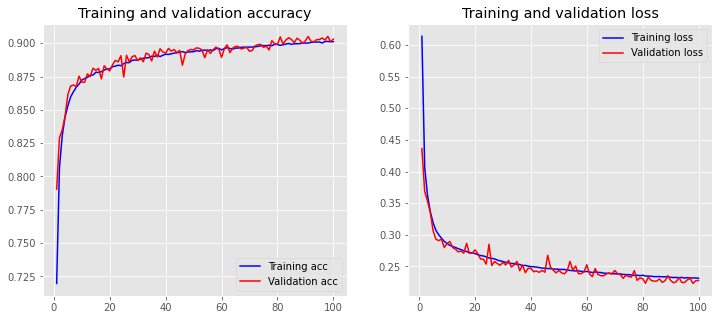

In [21]:
# Visualing Training and Testing accuracy + loss
plot_history(history)

**2. Convolutional Neural Network:**

In this method, we create a 2 dimnesional matrix as input signal. This 2 dimensions are defined as channels and epochs. For each stimulus, 1 second (256 data points per second) of data was recorded for 64 channels. Hence, making matrix with 256 columns and 64 rows for each stimulus. 


As we know, Convolutional Neural Network works very well in the case of 2D dataset (Mostly Image Processing).





*   Prepare data as per our requirements.

  *   In this case, we are making 2D dataset for each stimulus. Hence, creating channels as rows and epochs as columns. Fo each matrix we will have one target variable as True or False for alcoholic class.
*   Divide data into 80-20 part for training and testing respectively.
 
*   Create sequential 2D Covolutional Neural Network model using Keras libraries

*   Train and Test the model



In [75]:
# Importing required libraries
import numpy as np
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten, Dense

In [36]:
# Creating datapoints from full datasets
df_data2 = df_data.iloc[:, 0:64]

In [90]:
#df_data2

In [71]:
# Creating 2D matrix as well as target variables as per requirements.
n = 0
train_image = []
y = []
for i in range(int(len(df_data2)/256)):
  temp = df_data2[n:n+256]
  temp2 = temp.T
  temp2 = temp2.reset_index(drop=True)
  img = image.img_to_array(temp2)
  train_image.append(img)
  y1 = df_data['class'][n]
  y.append(y1)
  n += 256
  #print(n)

In [76]:
# Tranforming target variables to one-hot encode vector
data2 = np.array(train_image)
y = to_categorical(y)

In [78]:
# Spliting data to train and test with 80-20 condition
X_train, X_test, y_train, y_test = train_test_split(data2, y, random_state=42, test_size=0.2)

In [81]:
# Defining 2D Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(64,256,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [82]:
# Compiling model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [83]:
# Training the model
history2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 32s 66ms/step - loss: 11.1022 - accuracy: 0.5729 - val_loss: 0.6642 - val_accuracy: 0.6083
Epoch 2/10
480/480 [==============================] - 30s 63ms/step - loss: 0.6041 - accuracy: 0.6833 - val_loss: 0.6256 - val_accuracy: 0.6250
Epoch 3/10
480/480 [==============================] - 30s 63ms/step - loss: 0.5766 - accuracy: 0.6896 - val_loss: 0.5205 - val_accuracy: 0.7500
Epoch 4/10
480/480 [==============================] - 30s 63ms/step - loss: 0.4437 - accuracy: 0.8083 - val_loss: 0.3875 - val_accuracy: 0.8667
Epoch 5/10
480/480 [==============================] - 32s 66ms/step - loss: 0.2557 - accuracy: 0.9083 - val_loss: 0.3369 - val_accuracy: 0.8583
Epoch 6/10
480/480 [==============================] - 31s 65ms/step - loss: 0.1840 - accuracy: 0.9354 - val_loss: 0.2415 - val_accuracy: 0.9083
Epoch 7/10
480/480 [==============================] - 30s 63ms/step - loss: 0.1035 - accu

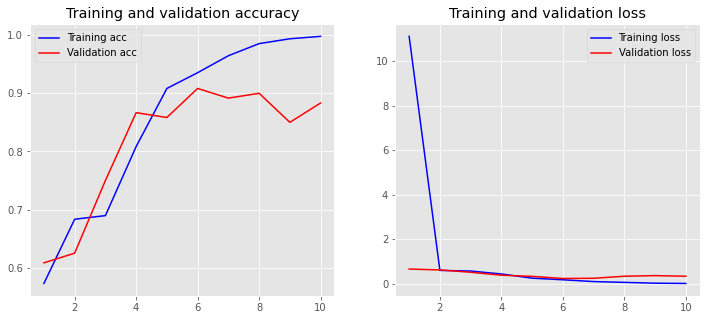

In [84]:
# Visualing Training and Testing accuracy + loss
plot_history(history2)

From above plots (For both methods), we can observe that training accuracy for the convolutional neural network is higher than the single layer shallow neural network. However, it does not mean CNN is better than shallow neural network.

We also need to look at the validation accuracy and loss. In CNN, training accuracy and validation accuracy has very big difference, which means there ight be overfitting of the model.

The reason behind overfitting is, lee amount of data for deep neural network. Here, we have total 600 instances for training and testing combine. After spliting it into training and testing, this deep neural network has only 480 instance for training, which is very less.

On the other hand, when we were using shallow neural network, we used each row as one instance for epoch. Hence, our total dataset was 153,600 instances with training instances were 122,880. It was quite enough for training shallow neural network.

If have more datapoints for CNN, we can make it more reliable model. 